<a href="https://colab.research.google.com/github/Gparrac/happiness-project-icfes/blob/main/Happiness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Marco teorico
En este proyecto se buscó implementar un indice de felicidad a nivel nacional en el pais de Colombia para cada participante de las pruebas de estado Icfes mediante el acceso a datos abiertos del gobierno. De esta forma se buscaron correlacionar variables que estuvieran envolucradas en el nivel economico, de salud y bienestar con el que convive la persona para lograr una respuesta más acertada.
## Requerimientos 
Se utilizaron las siguientes librerias para la limpieza de datos



In [35]:
import pandas as pa
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

A cotinuación se observan el dataset para la practica



In [36]:
df=pa.read_csv('/content/drive/MyDrive/test-icfes.csv')


df


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,1/9/2004,20214,SB11202140617020,ESTUDIANTE,COLOMBIA,No,CALDAS,...,6.0,A-,158,2.0,NaN,"487,650,763,110,128",2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
1,TI,COLOMBIA,M,4/6/2005,20214,SB11202140623058,ESTUDIANTE,COLOMBIA,No,CALDAS,...,30.0,A-,179,8.0,NaN,"476,571,760,959,939",2.0,2.0,PUBLICAR,NO
2,TI,COLOMBIA,F,3/28/2004,20214,SB11202140623602,ESTUDIANTE,COLOMBIA,No,CALDAS,...,29.0,A-,239,47.0,NaN,"375,028,573,315,051",1.0,1.0,PUBLICAR,NO
3,TI,COLOMBIA,F,4/28/2005,20214,SB11202140622167,ESTUDIANTE,COLOMBIA,No,RISARALDA,...,38.0,A-,232,42.0,NaN,"440,924,029,308,367",2.0,1.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,F,11/16/2004,20214,SB11202140633564,ESTUDIANTE,COLOMBIA,No,CALDAS,...,55.0,A1,270,69.0,NaN,"515,977,592,692,164",3.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,TI,COLOMBIA,F,8/13/2003,20214,SB11202140146443,ESTUDIANTE,COLOMBIA,No,SANTANDER,...,23.0,A-,236,45.0,NaN,"403,870,033,280,962",1.0,2.0,PUBLICAR,NO
65531,TI,COLOMBIA,F,1/18/2005,20214,SB11202140140680,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,...,40.0,A-,297,83.0,NaN,"478,065,710,698,455",2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
65532,TI,COLOMBIA,F,1/19/2005,20214,SB11202140142142,ESTUDIANTE,COLOMBIA,No,SANTANDER,...,98.0,B1,347,97.0,NaN,"712,381,541,486,684",4.0,4.0,PUBLICAR,NO
65533,TI,COLOMBIA,M,2/15/2004,20214,SB11202140126772,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,...,74.0,A1,250,55.0,NaN,"613,444,950,954,104",3.0,3.0,PUBLICAR,NO


##Desarrollo
### Purificación
1. A continuación se realiza la limpieza de datos y se presentan los datos con los que se trabajaran

In [26]:
#df['ESTU_MCPIO_RESIDE'] != 'BOGOTA'
# df[(df['ESTU_DEPTO_RESIDE'] == 'BOGOTÁ') | (['ESTU_MCPIO_RESIDE'] == 'BOGOTÁ D.C')].shape
df = df.fillna('-')
df_clean = df.loc[:,['ESTU_GENERO','ESTU_FECHANACIMIENTO','ESTU_TIENEETNIA','FAMI_ESTRATOVIVIENDA','FAMI_PERSONASHOGAR','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECONSOLAVIDEOJUEGOS','FAMI_NUMLIBROS','FAMI_COMELECHEDERIVADOS','FAMI_COMECARNEPESCADOHUEVO','FAMI_COMECEREALFRUTOSLEGUMBRE','FAMI_SITUACIONECONOMICA','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET','COLE_GENERO','COLE_JORNADA','PUNT_GLOBAL']]
df_clean = df_clean.drop(df_clean[(df_clean['FAMI_ESTRATOVIVIENDA'] == '-') | (df_clean['FAMI_PERSONASHOGAR'] == '-') | (df_clean['FAMI_SITUACIONECONOMICA'] == '-') | (df_clean['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato') ].index,axis=0)
df_clean


,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,COLE_GENERO,COLE_JORNADA,PUNT_GLOBAL
0,F,1/9/2004,No,Estrato 1,3 a 4,No,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,MIXTO,MAÑANA,158
1,M,4/6/2005,No,Estrato 2,5 a 6,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,MIXTO,MAÑANA,179
2,F,3/28/2004,No,Estrato 2,7 a 8,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,MIXTO,MAÑANA,239
4,F,11/16/2004,No,Estrato 2,7 a 8,Si,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,MIXTO,UNICA,270
5,F,1/5/2004,Si,Estrato 1,7 a 8,No,Si,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,MIXTO,COMPLETA,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,F,8/13/2003,No,Estrato 2,5 a 6,-,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Mejor,30 minutos o menos,Entre 30 y 60 minutos,MIXTO,MAÑANA,236
65531,F,1/18/2005,No,Estrato 2,3 a 4,Si,No,No,0 A 10 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,MIXTO,COMPLETA,297
65532,F,1/19/2005,No,Estrato 3,3 a 4,Si,Si,Si,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 1 y 3 horas,MIXTO,COMPLETA,347
65533,M,2/15/2004,No,Estrato 2,3 a 4,Si,Si,Si,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Peor,No leo por entretenimiento,Más de 3 horas,MIXTO,MAÑANA,250


Luego se editan los valores de las columnas a trabajar

---



In [11]:


arr_fechas = np.array(df_clean['ESTU_FECHANACIMIENTO'])
arr_personas_hogar = np.array(df_clean['FAMI_PERSONASHOGAR'])
arr_estrato = np.array(df_clean['FAMI_ESTRATOVIVIENDA'])
fecha_actual = datetime.now()


for index in range(df_clean.shape[0]):
  arr_fechas.itemset(index,relativedelta(datetime.now(),datetime.strptime(arr_fechas[index][0:10],'%m/%d/%Y')).years) 
  arr_personas_hogar.itemset(index,int(arr_personas_hogar[index][0:2]) if len(str(arr_personas_hogar[index])) > 1 else 0)
  arr_estrato.itemset(index,arr_estrato[index].replace('Estrato ',''))

df_clean['FAMI_PERSONASHOGAR'] = arr_personas_hogar
df_clean['EDAD'] = arr_fechas
df_clean['FAMI_ESTRATOVIVIENDA'] = arr_estrato
df_clean.head()


,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,COLE_GENERO,COLE_JORNADA,PUNT_GLOBAL,EDAD
0,F,1/9/2004,No,1,3,No,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,MIXTO,MAÑANA,158,18
1,M,4/6/2005,No,2,5,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,MIXTO,MAÑANA,179,17
2,F,3/28/2004,No,2,7,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,MIXTO,MAÑANA,239,18
4,F,11/16/2004,No,2,7,Si,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,MIXTO,UNICA,270,17
5,F,1/5/2004,Si,1,7,No,Si,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,MIXTO,COMPLETA,237,18


Los posibles valores para cada variables seran:
### Bienestar
  - Minimo de personas con quien convive:
    - Peor && * || Igual && 1,7,9  ⛔
    - Igual && 3, Mejor && 3 ⭕
    - Mejor && 5,7,9 || Igual 5 ✅

In [37]:
df_clean['FAMI_PERSONASHOGAR'].unique()

array(['3 a 4', '5 a 6', '7 a 8', '9 o más', '1 a 2'], dtype=object)

- Sumatoria de tipos de entretenimiento y ocio:
  - 0 ⛔
  - 1⭕
  - 2, 3 y 4 ✅
En número de libros se tendran en cuenta '-', '0 a 10 libros' como si y las demas respuestas como noa



In [38]:
df_clean['FAMI_TIENEINTERNET'].unique()

array(['No', 'Si', '-'], dtype=object)

In [39]:
df_clean['FAMI_TIENESERVICIOTV'].unique()

array(['No', 'Si', '-'], dtype=object)

In [40]:
df_clean['FAMI_TIENECONSOLAVIDEOJUEGOS'].unique()

array(['Si', 'No', '-'], dtype=object)

In [41]:
df_clean['FAMI_NUMLIBROS'].unique()

array(['26 A 100 LIBROS', '0 A 10 LIBROS', '11 A 25 LIBROS',
       'MÁS DE 100 LIBROS', '-'], dtype=object)

### Economía
*   Clasificación estrato social:
  -  1,2 ⛔
  - 3 ⭕
  - 4,5,6 ✅


In [29]:
df_clean['FAMI_ESTRATOVIVIENDA'].unique()

array(['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 6',
       'Estrato 5'], dtype=object)

  - Situación economica:
    - Peor⛔
    - Igual⭕
    - Mejor ✅






In [31]:
df_clean['FAMI_SITUACIONECONOMICA'].unique()

array(['Igual', 'Mejor', 'Peor'], dtype=object)

### Educación
* Tiempo de lectura
  -   '-' ⛔
  -  30 min o menos⭕
  - Entre 30 y 60 minutos, 1 y 2 horas, más de 2 horas ✅

In [19]:
df_clean['ESTU_DEDICACIONLECTURADIARIA'].unique()

array(['Entre 30 y 60 minutos', 'No leo por entretenimiento',
       '30 minutos o menos', 'Entre 1 y 2 horas', 'Más de 2 horas', '-'],
      dtype=object)

* Promedio puntaje global:
    - menor a 250⛔
    - entre 250  y 350 ⭕
    - mayor a 350 ✅


* Dedicación tiempo en internet:
    - No navega Internet⛔
    - 30 minutos o menos, más de 3 horas ⭕
    - Entre 30 y 60 minutos, entre 1 y 3 horas  ✅

In [20]:
df_clean['ESTU_DEDICACIONINTERNET'].unique()

array(['Entre 1 y 3 horas', 'No Navega Internet', 'Entre 30 y 60 minutos',
       'Más de 3 horas', '30 minutos o menos', '-'], dtype=object)

* Dedicación tiempo de lectura:
    - '-', 30 minutos o menos⛔
    -  No leo por entretenimiento⭕
    - Entre 30 y 60 minutos, Entre 1 y 2 horas, Más de 2 horas  ✅

In [ ]:
df_clean['ESTU_DEDICACIONLECTURADIARIA'].unique()

array(['Entre 30 y 60 minutos', 'No leo por entretenimiento',
       '30 minutos o menos', 'Entre 1 y 2 horas', 'Más de 2 horas', '-'],
      dtype=object)

### Salud

* Consumo de alimnetos por categorias (lacteos, legumbres y verduras, carnes):
  -   1 y 0 ⛔
  -  2⭕
  - 3 ✅
Se parametrizaran solo teniendo en cuenta si consume el producto o no lo consume.

In [21]:
df_clean['FAMI_COMELECHEDERIVADOS'].unique()

array(['1 o 2 veces por semana', '3 a 5 veces por semana',
       'Nunca o rara vez comemos eso', 'Todos o casi todos los días', '-'],
      dtype=object)

In [23]:
df_clean['FAMI_COMECEREALFRUTOSLEGUMBRE'].unique()

array(['1 o 2 veces por semana', '3 a 5 veces por semana',
       'Todos o casi todos los días', 'Nunca o rara vez comemos eso', '-'],
      dtype=object)

In [ ]:
df_clean['FAMI_COMECARNEPESCADOHUEVO'].unique()

array(['1 o 2 veces por semana', 'Todos o casi todos los días',
       '3 a 5 veces por semana', 'Nunca o rara vez comemos eso', '-'],
      dtype=object)

### Calculos y creación
Con los datos limpios y listos para trabajar se hacen los calculos por cada sub-categoria

1. se define la clase abstracta principal que servira de pilar para el calculo de las categorias mencionadas:

In [33]:
from abc import abstractmethod
class Categoria:
  
  @abstractmethod
  def cal_total(self):
    pass
  @abstractmethod
  def reiniciar_data(self):
    pass

2. Creamos las subclases por cada categoria y reescribimos los metodos implementados

In [34]:
#categoria educacion con tres parametros a evaluar: puntaje global, horas de internet y horas de lectura
class Educacion(Categoria): 
  def __init__(self):
      super().__init__()
      self.score_global = 0
      self.hour_int = 0
      self.hour_read = 0
  def set_registers(self, score_global, hour_int, hour_read) :
      aux_score = int(score_global)
      if aux_score > 350 :
        self.score_global = 1
      elif aux_score > 250 :
        self.score_global = 0.5 
      else :
        self.score_global = 0
      if hour_int == "Entre 30 y 60 minutos" or hour_int == "Entre 1 y 3 horas":        
        self.hour_int = 1
      elif hour_int == "Más de 3 horas" or hour_int == "30 minutos o menos":
        self.hour_int = 0.5
      else :
        self.hour_int = 0
      if hour_read == "Entre 30 y 60 minutos" or hour_read == "Entre 1 y 2 horas" or hour_read == "Más de 2 horas":
        self.hour_read = 1
      elif hour_read == "No leo por entretenimiento":
        self.hour_read = 0.5
      else :
        self.hour_read = 0
  def reiniciar_data(self):
      self.score_global = 0
      self.hour_int = 0
      self.hour_read = 0
  def cal_total(self):
      return (self.score_global + self.hour_int + self.hour_read)/3
#categoria economia con dos parametros a evaluar: estrato,  y estado economico
class Economia(Categoria): 
  def __init__(self):
      super().__init__()
      self.estrato = 0
      self.nivel_eco = 0
  def set_registers(self, estrato, nivel_eco) :
      aux_score = int(estrato)
      if aux_score >= 4 :
        self.estrato = 1
      elif aux_score == 3 :
        self.estrato = 0.5 
      else :
        self.estrato = 0
      if nivel_eco == "Mejor":        
        self.nivel_eco = 1
      elif nivel_eco == "Igual":
        self.nivel_eco = 0.5
      else :
        self.nivel_eco = 0
  def reiniciar_data(self):
      self.estrato = 0
      self.nivel_eco = 0
  def cal_total(self):
      return (self.estrato + self.nivel_eco)/2
#categoria bienestar con tres parametros a evaluar: #personas convive,  y entretenimiento disponible
class Bienestar(Categoria): 
  def __init__(self):
      super().__init__()
      self.per_convive = 0
      self.total_entre = 0
  def set_registers(self, per_convive, nivel_eco, has_tv, has_int, has_vg, has_lb) :
      aux_score = int(per_convive)
      if aux_score >= 5 and (nivel_eco == "Mejor" or nivel_eco == "Igual"):
        self.per_convive = 1
      elif aux_score == 3 and (nivel_eco == "Mejor" or nivel_eco == "Igual"):
        self.per_convive = 0.5 
      else :
        self.per_convive = 0
      if has_tv == 'Si':
          self.total_entre = 1
      if has_int == 'Si':
          self.total_entre = 1
      if has_vg == 'Si':
          self.total_entre = 1                    
      if has_lb != "0 A 10 LIBROS" and has_lb != "-":
          self.total_entre = 1                    
      self.total_entre = (1 if self.total_entre >= 3 else 0 )
  def reiniciar_data(self):
      self.per_convive = 0
      self.total_entre = 0
  def cal_total(self):
      return (self.per_convive + self.total_entre)/2      
#categoria salud con un parametro a evaluar: alimentos
class Salud(Categoria): 
  def __init__(self):
      super().__init__()
      self.total_meal = 0
      
  def set_registers(self, eat_veg, eat_meat, eat_milk) :
      aux_arr = [eat_veg, eat_meat, eat_milk]
      aux_right = aux_arr.count('Todo o casi todos los días') + aux_arr.count('3 a 5 veces por semana')
      aux_regular = aux_arr.count('1 o 2 veces por semana')
      if aux_right > 2 :
        self.total_meal = 1
      elif (aux_right > 0 and aux_regular > 1) or aux_regular == 3 :
        self.total_meal = 0.5
      else:
        self.total_meal = 0
  def reiniciar_data(self):
      self.total_meal = 0

  def cal_total(self):
      return self.total_meal
  

3. Se instancian los objetos creados anteriormentente para la creación de los indices por categoria

In [ ]:
df_clean.index

Int64Index([    0,     1,     2,     4,     5,     6,     7,     8,     9,
               10,
            ...
            65525, 65526, 65527, 65528, 65529, 65530, 65531, 65532, 65533,
            65534],
           dtype='int64', length=58145)

In [ ]:
test_edu = Educacion()
test_eco = Economia()
test_wel = Bienestar()
test_salud = Salud()
df_clean['INDICE_EDU'] = np.zeros(df_clean.shape[0]) 
df_clean['INDICE_ECO'] = np.zeros(df_clean.shape[0]) 
df_clean['INDICE_WEL'] = np.zeros(df_clean.shape[0]) 
df_clean['INDICE_SAL'] = np.zeros(df_clean.shape[0]) 
for index in df_clean.index:
  test_edu.set_registers(df_clean['PUNT_GLOBAL'][index],df_clean['ESTU_DEDICACIONINTERNET'][index],df_clean['ESTU_DEDICACIONLECTURADIARIA'][index])
  test_eco.set_registers(df_clean['FAMI_ESTRATOVIVIENDA'][index],df_clean['FAMI_SITUACIONECONOMICA'][index])
  test_wel.set_registers(df_clean['FAMI_PERSONASHOGAR'][index],df_clean['FAMI_SITUACIONECONOMICA'][index], df_clean['FAMI_TIENESERVICIOTV'][index], df_clean['FAMI_TIENEINTERNET'][index], df_clean['FAMI_TIENECONSOLAVIDEOJUEGOS'][index], df_clean['FAMI_NUMLIBROS'][index])
  test_salud.set_registers(df_clean['FAMI_COMECEREALFRUTOSLEGUMBRE'][index],df_clean['FAMI_COMECARNEPESCADOHUEVO'][index], df_clean['FAMI_COMELECHEDERIVADOS'][index])  
  df_clean.at[index,'INDICE_EDU'] = test_edu.cal_total()
  df_clean.at[index,'INDICE_ECO'] = test_eco.cal_total()
  df_clean.at[index,'INDICE_WEL'] = test_wel.cal_total()
  df_clean.at[index,'INDICE_SAL'] = test_salud.cal_total()
df_clean



,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,...,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,COLE_GENERO,COLE_JORNADA,PUNT_GLOBAL,EDAD,INDICE_EDU,INDICE_ECO,INDICE_WEL,INDICE_SAL
0,F,1/9/2004,No,1,3,No,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,...,Entre 30 y 60 minutos,Entre 1 y 3 horas,MIXTO,MAÑANA,158,18,0.666667,0.25,0.25,0.5
1,M,4/6/2005,No,2,5,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,...,No leo por entretenimiento,No Navega Internet,MIXTO,MAÑANA,179,17,0.166667,0.25,0.50,0.0
2,F,3/28/2004,No,2,7,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,...,Entre 30 y 60 minutos,Entre 1 y 3 horas,MIXTO,MAÑANA,239,18,0.666667,0.25,0.50,0.0
4,F,11/16/2004,No,2,7,Si,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,...,30 minutos o menos,Entre 1 y 3 horas,MIXTO,UNICA,270,17,0.500000,0.25,0.50,0.5
5,F,1/5/2004,Si,1,7,No,Si,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,...,30 minutos o menos,Entre 30 y 60 minutos,MIXTO,COMPLETA,237,18,0.333333,0.50,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,F,8/13/2003,No,2,5,-,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,...,30 minutos o menos,Entre 30 y 60 minutos,MIXTO,MAÑANA,236,18,0.333333,0.50,0.50,0.0
65531,F,1/18/2005,No,2,3,Si,No,No,0 A 10 LIBROS,3 a 5 veces por semana,...,Entre 30 y 60 minutos,Más de 3 horas,MIXTO,COMPLETA,297,17,0.666667,0.25,0.25,1.0
65532,F,1/19/2005,No,3,3,Si,Si,Si,26 A 100 LIBROS,Todos o casi todos los días,...,30 minutos o menos,Entre 1 y 3 horas,MIXTO,COMPLETA,347,17,0.500000,0.75,0.25,0.0
65533,M,2/15/2004,No,2,3,Si,Si,Si,0 A 10 LIBROS,3 a 5 veces por semana,...,No leo por entretenimiento,Más de 3 horas,MIXTO,MAÑANA,250,18,0.333333,0.00,0.00,0.0


4. Finalmente se calcula el indice de felicidad teniendo los resultados anteriores.

In [ ]:
df_clean['INDICE_FELICIDAD'] = (df_clean['INDICE_ECO']+df_clean['INDICE_EDU']+df_clean['INDICE_WEL']+df_clean['INDICE_SAL'])/4
df_clean['INDICE_FELICIDAD']

0        0.416667
1        0.229167
2        0.354167
4        0.437500
5        0.333333
           ...   
65530    0.333333
65531    0.541667
65532    0.375000
65533    0.083333
65534    0.312500
Name: INDICE_FELICIDAD, Length: 58145, dtype: float64

##Analisis de resultados


* El indice de felicidad más alto, segun el datase fue de 0.83333
* El indice de felicidad más bajo fue de 0.00
* La media de los resultados fue de 0.308852 

In [ ]:
df_clean['INDICE_FELICIDAD'].describe()

count    58145.000000
mean         0.308852
std          0.117066
min          0.000000
25%          0.229167
50%          0.312500
75%          0.395833
max          0.833333
Name: INDICE_FELICIDAD, dtype: float64

A continuación se presenta un contraste el promedio de cada indice de felicidad; donde se aprecia que la categoria de salud tuvo el indice más bajo y la de bienestar se encuentra en el más alto

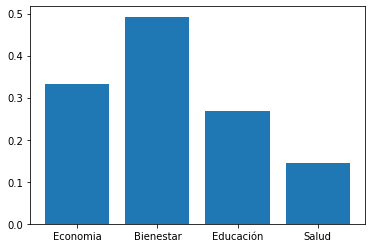

In [ ]:
df_clean['INDICE_ECO'].mean()
y_eg_index = np.array([df_clean['INDICE_ECO'].mean(),df_clean['INDICE_EDU'].mean(),df_clean['INDICE_WEL'].mean(),df_clean['INDICE_SAL'].mean()])
x_eg_index = np.array(['Economia','Bienestar','Educación','Salud'])
plt.bar(x_eg_index,y_eg_index);
plt.show()



([<matplotlib.patches.Wedge at 0x7f30c936c890>,
 [Text(1.0992111002879617, 0.041652815075679826, 'feliz'),
  Text(-0.10630870896802015, 1.0948508840922369, 'neutral'),
  Text(0.06477467686924272, -1.0980911807479767, 'poco feliz')])

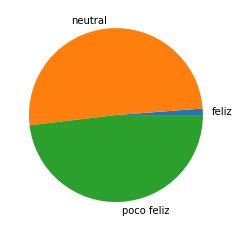

In [ ]:
feliz = df_clean[df_clean['INDICE_FELICIDAD'] > 0.6 ].shape[0]
poco_feliz = df_clean[(df_clean['INDICE_FELICIDAD'] <= 0.6) & (df_clean['INDICE_FELICIDAD'] >= 0.3) ].shape[0]
triste = df_clean[df_clean['INDICE_FELICIDAD'] < 0.3 ].shape[0]


plt.pie([feliz, poco_feliz, triste],labels=["feliz","neutral","poco feliz"])


In [ ]:
pro_poco_feliz = (poco_feliz)/df_clean.shape[0]
pro_feliz = (feliz)/df_clean.shape[0]
pro_triste = (triste)/df_clean.shape[0]
'poco feliz:'+str(pro_poco_feliz), 'feliz:' +str(pro_feliz), 'triste: ' + str(pro_triste)

('poco feliz:0.5066987703155903',
 'feliz:0.012056066729727406',
 'triste: 0.4812451629546823')

In [ ]:
df_clean['COLE_JORNADA'].unique()

array(['MAÑANA', 'UNICA', 'COMPLETA', 'NOCHE', 'SABATINA', 'TARDE'],
      dtype=object)

Por otro lado se estudio el puntaje de felicidad por genero encontrando el siguiente indicador

In [ ]:
arr_mañana = df_clean[df_clean['COLE_JORNADA']=='MAÑANA'] 
arr_unica = df_clean[df_clean['COLE_JORNADA']=='UNICA']
arr_completa = df_clean[df_clean['COLE_JORNADA']=='COMPLETA']
arr_noche = df_clean[df_clean['COLE_JORNADA']=='NOCHE']
arr_sabatina = df_clean[df_clean['COLE_JORNADA']=='SABATINA']
arr_tarde = df_clean[df_clean['COLE_JORNADA']=='TARDE']
plt
# plt.plot(df_global_f['EDAD'],df_global_f['INDICE_ECO'], marker='0',linestyle='--')
# plt.plot(df_global_f['EDAD'],df_global_f['INDICE_EDU'], marker='0',linestyle='--')
# plt.plot(df_global_f['EDAD'],df_global_f['INDICE_SAL'], marker='0',linestyle='--')
# plt.plot(df_global_f['EDAD'],df_global_f['INDICE_WEL'], marker='0',linestyle='--')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

### correlacionado y validando detos

In [ ]:
df_corr = df_clean.corr(method="pearson")


Realizando un grafico de calor para observar la correlación tenemos:

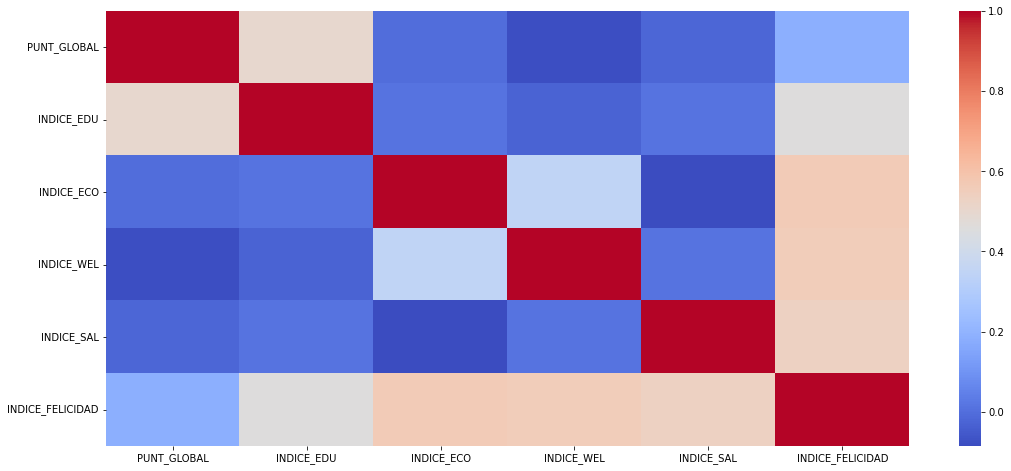

In [ ]:
plt.figure(figsize=(18,8)) #Asignamos el tamaño del grafico
sns.heatmap(df_corr,
            xticklabels = df_corr.columns,
            yticklabels = df_corr.columns,
            cmap='coolwarm'
           ) #realizamos nuestro grafico de calor a partir de el paquete seaborn

In [ ]:
N = df_clean.shape[1]#Cantidad de variables utilizadas
data_corr_swls = df_clean.corr(method='pearson')
rs = np.array([])
#sumamos todas las correlaciones del triangulo superior de la matriz de correlaciones
for i, col in enumerate(data_corr_swls.columns): 
    sum_ = data_corr_swls[col][i+1:].values 
    rs = np.append(sum_, rs)
mean_r = np.mean(rs) #Obtenemos el promedio de rs 036
cronbach_alpha = (N*mean_r)/(1+(N-1)* mean_r) #A través de la formula de alfa de cronbach obtenemos el valor
cronbach_alpha

0.856292171522242